# PUBLIC HEALTH AWARENESS CAMPAIGN ANALYSIS
**PHASE 4:  DEVELOPMENT PART-2**


> Designing dashboards and reports in IBM Cognos to visualize campaign reach, awareness levels, and impact metrics.



In [37]:
from google.colab import files
from IPython.display import Image
Dashboard=files.upload()

Saving dashboard.png to dashboard.png
Saving dashboard1.png to dashboard1.png
Saving report.png to report.png


**Dashboard:**

 The below  dashboard represents the campaign reach, awareness levels, and impact metrics of the PUBLIC HEALTH AWARENESS CAMPAIGN

In [ ]:
from google.colab import files
from IPython.display import Image
Dashboard=files.upload()

Saving dashboard.png to dashboard.png
Saving dashboard1.png to dashboard1.png
Saving report.png to report.png


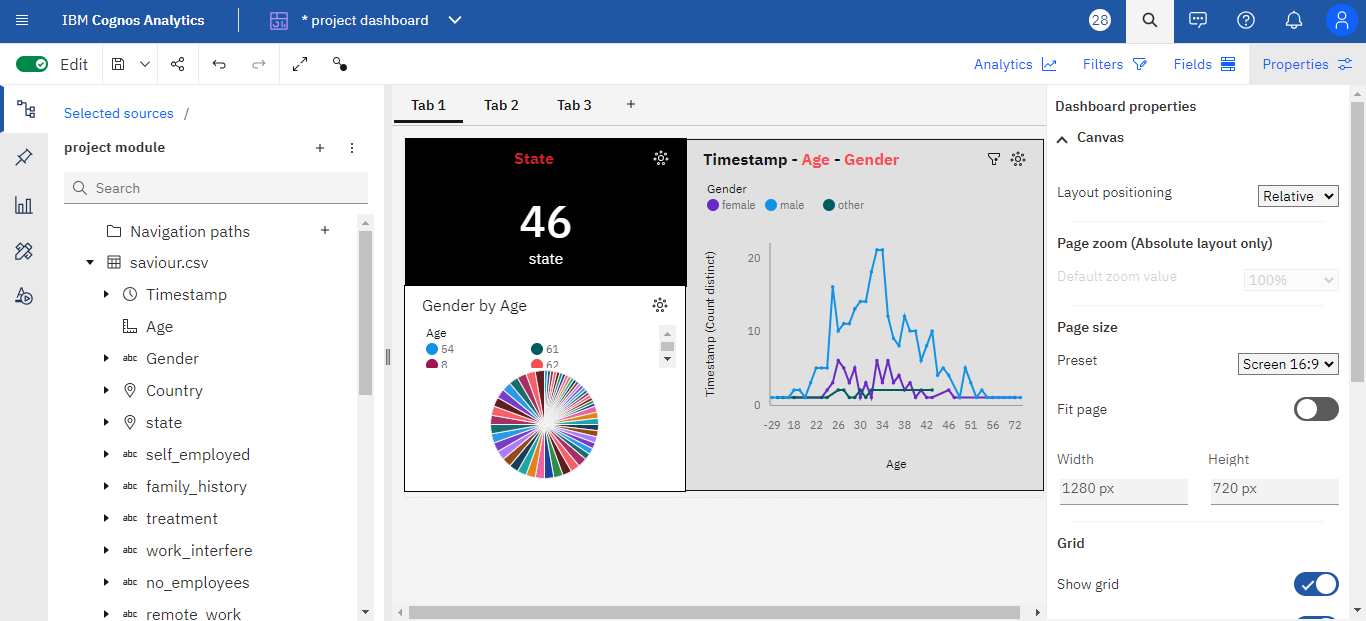

In [38]:
Image('dashboard.png',width=800)



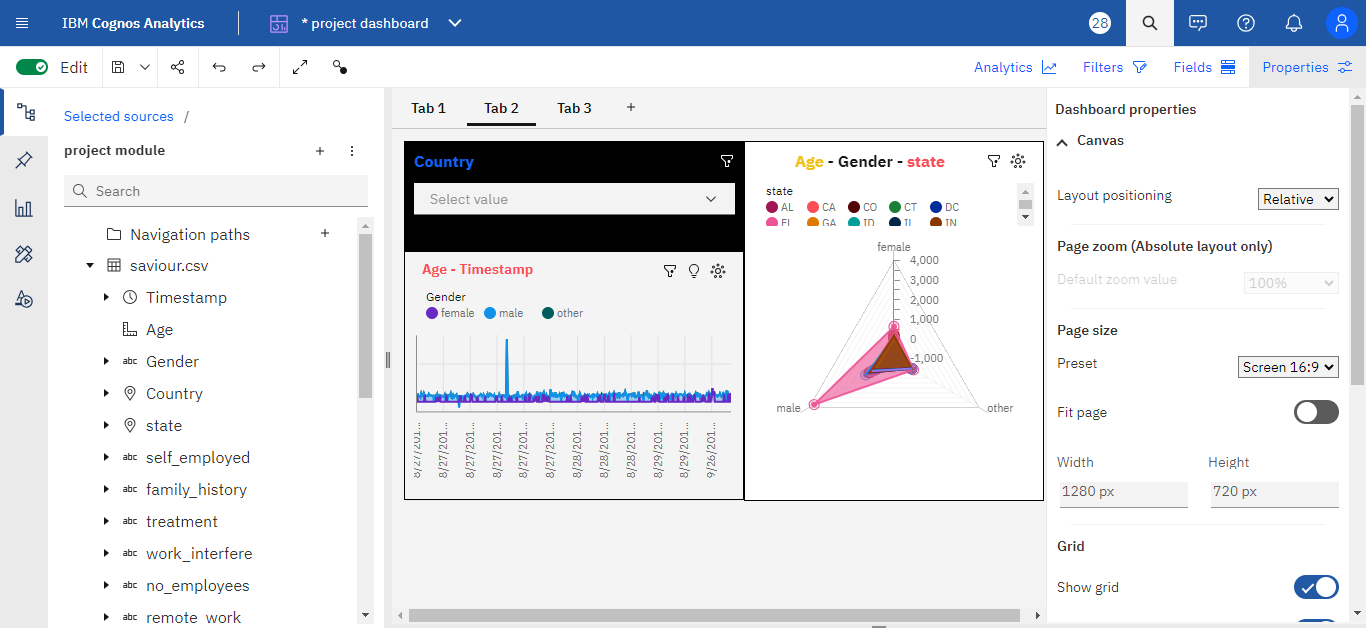

In [39]:
Image('dashboard1.png',width=800)


**REPORT:**


The below  Report represents the campaign reach, awareness levels, and impact metrics of the PUBLIC HEALTH AWARENESS CAMPAIGN



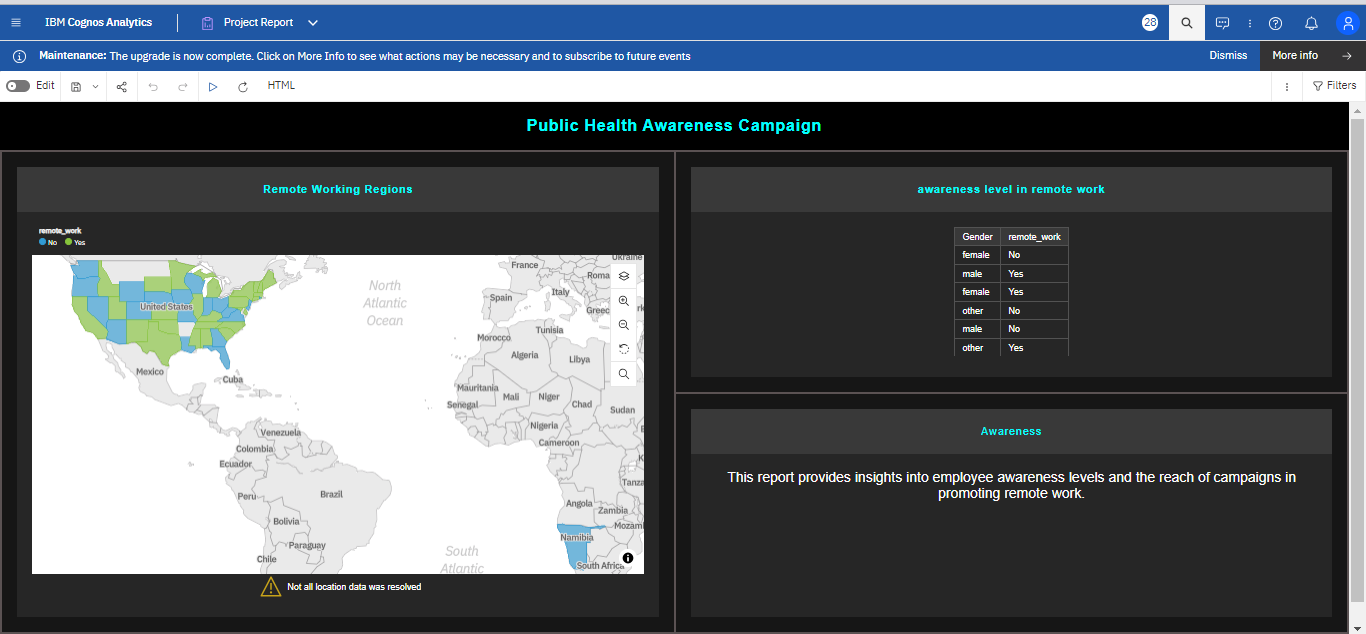

In [40]:
Image('report.png',width=800)


**ENAGAGEMENT RATES**


*   Engagement rates measures the level of audience interaction and participation with campaign content, such as likes, shares, comments, and click-through rates.
* Higher engagement rates often indicate a more impactful and influential campaign, as it signifies the message's resonance and reach within the target population.



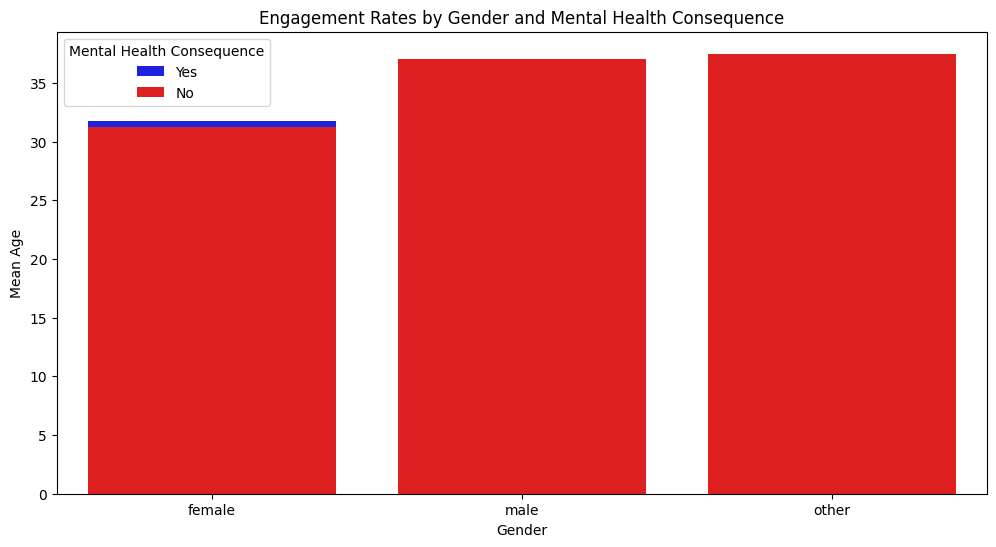

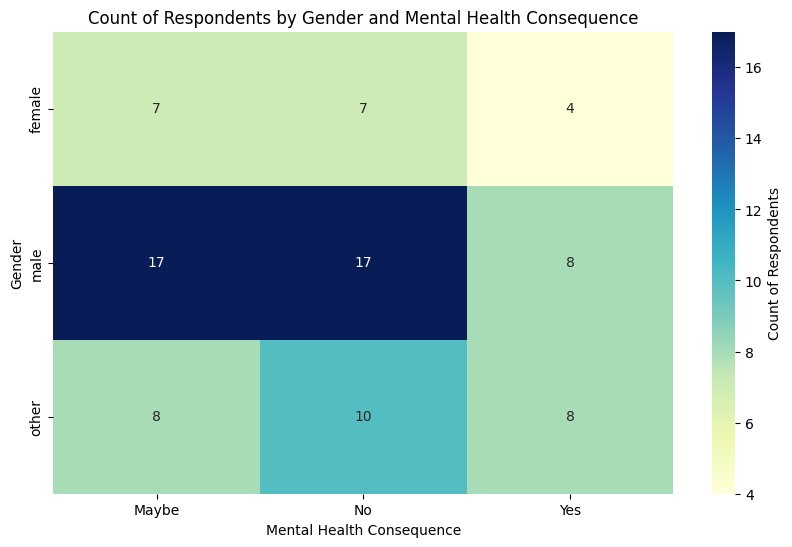

In [ ]:
#ENAGAGEMENT RATES

# calculating engagement rates gender and mental_health_consequences
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("survey1.csv")

# Assuming you have 'Gender' and 'mental_health_consequence' columns, as well as an 'Age' metric
# Calculate engagement rates by gender and mental health consequence
engagement_rates = data.groupby(['Gender', 'mental_health_consequence'])['Age'].mean().unstack()

# You can also calculate the count of respondents in each group
count_by_group = data.groupby(['Gender', 'mental_health_consequence']).size().unstack()

# Create a bar plot for engagement rates
plt.figure(figsize=(12, 6))
sns.barplot(x=engagement_rates.index, y=engagement_rates['Yes'], color='b', label='Yes')
sns.barplot(x=engagement_rates.index, y=engagement_rates['No'], color='r', label='No')
plt.title("Engagement Rates by Gender and Mental Health Consequence")
plt.xlabel("Gender")
plt.ylabel("Mean Age")
plt.legend(title="Mental Health Consequence")
plt.show()

# Create a heatmap for respondent counts
plt.figure(figsize=(10, 6))
sns.heatmap(count_by_group, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': 'Count of Respondents'})
plt.title("Count of Respondents by Gender and Mental Health Consequence")
plt.xlabel("Mental Health Consequence")
plt.ylabel("Gender")
plt.show()


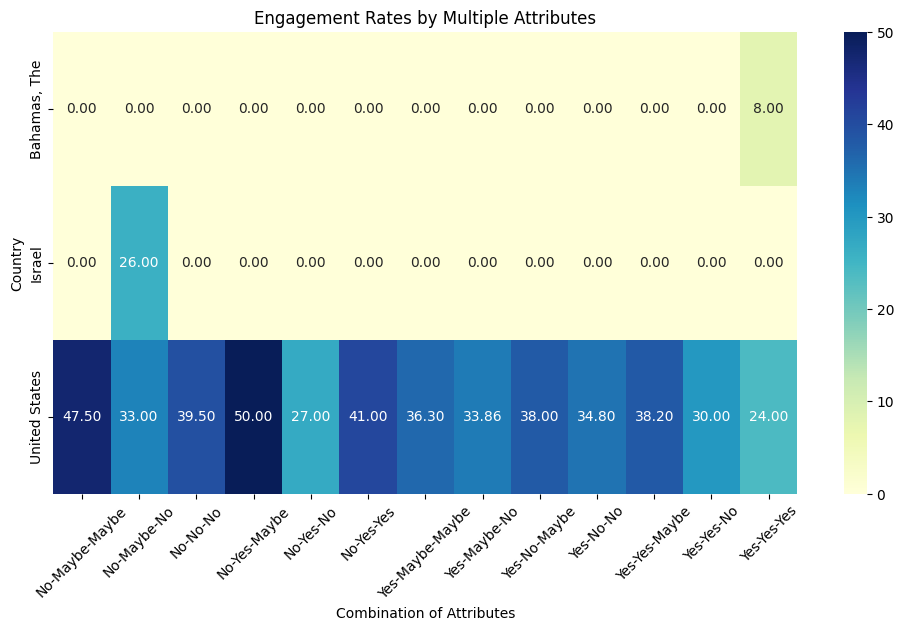

In [ ]:
#ENAGAGEMENT RATES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("survey1.csv")

# Assuming you have columns 'Country', 'treatment', 'mental_health_consequence', 'phys_health_consequence', and 'EngagementRate'

# Calculate engagement rates for different combinations of attributes
engagement_rates = data.groupby(['Country', 'treatment', 'mental_health_consequence', 'phys_health_consequence'])['Age'].mean().reset_index()

# Pivot the data to prepare it for the heatmap
pivot_table = engagement_rates.pivot_table(index='Country', columns=['treatment', 'mental_health_consequence', 'phys_health_consequence'], values='Age', fill_value=0)

# Create a heatmap for engagement rates
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title("Engagement Rates by Multiple Attributes")
plt.xlabel("Combination of Attributes")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.show()


**DEMOGRAPHIC ANALYSIS**



*  Demographic analysis is the study of population characteristics, such as age, gender, income, and location, to gain insights into the composition and trends of a specific group.
*  It is crucial for businesses, governments, and researchers to make informed decisions and tailor services, products, or policies to target audiences effectively. Demographic data helps in understanding the dynamics of populations and their evolving needs.






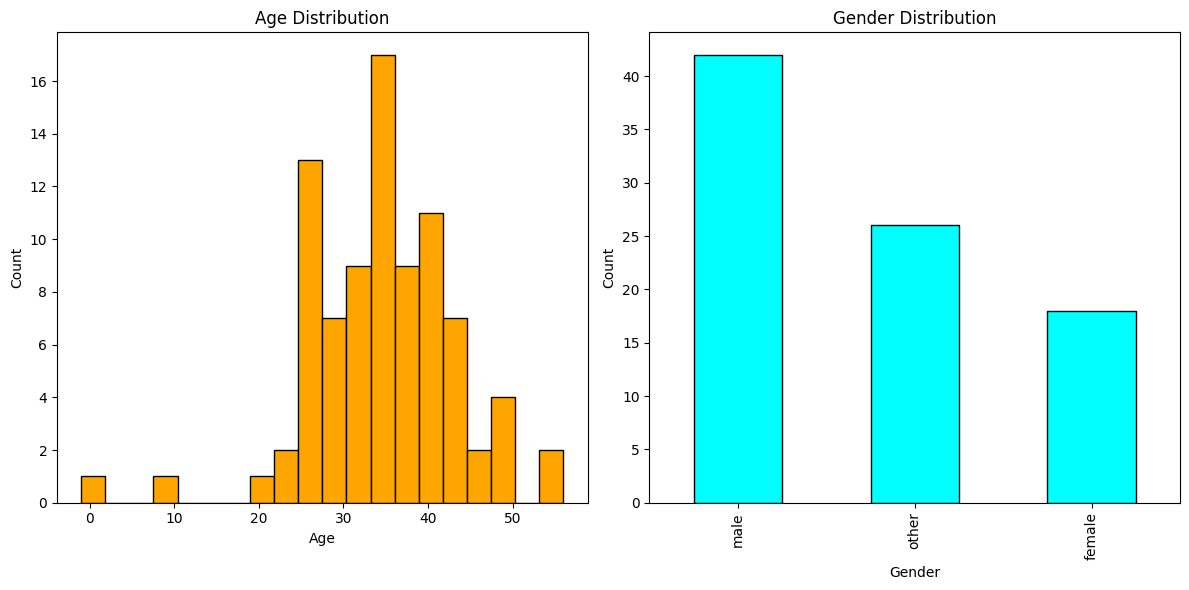

Basic Statistics for Age:
count    86.000000
mean     34.662791
std       8.676690
min      -1.000000
25%      30.000000
50%      35.000000
75%      39.750000
max      56.000000
Name: Age, dtype: float64
Gender Distribution:
male      42
other     26
female    18
Name: Gender, dtype: int64


In [ ]:
#DEMOGRAPHIC ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("survey1.csv")

# Data Cleaning (if needed)
# For example, handling missing values
data = data.dropna(subset=['Age', 'Gender'])

# Basic statistics for age
age_stats = data['Age'].describe()

# Gender distribution
gender_counts = data['Gender'].value_counts()

# Create visualizations
plt.figure(figsize=(12, 6))

# Histogram for age distribution
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Bar chart for gender distribution
plt.subplot(1, 2, 2)
gender_counts.plot(kind='bar', color='cyan',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.tight_layout()  # Ensures the plots are well-arranged
plt.show()

# Display basic statistics for age
print("Basic Statistics for Age:")
print(age_stats)

# Display gender counts
print("Gender Distribution:")
print(gender_counts)


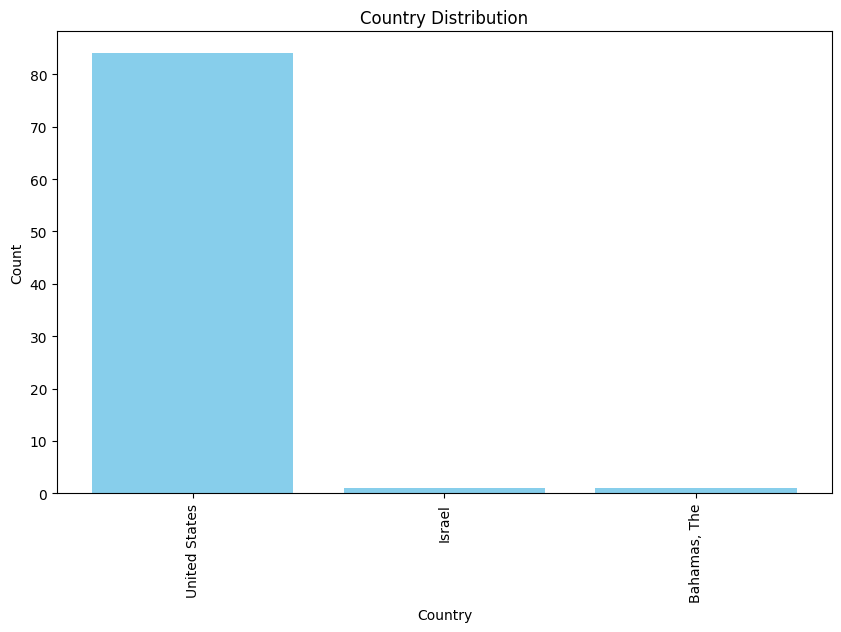

In [ ]:

# Create a bar plot for employment status distribution

#DEMOGRAPHIC ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("survey1.csv")

# Calculate the distribution of respondents by country
country_distribution = data['Country'].value_counts()

# Create a bar plot for country distribution
plt.figure(figsize=(10, 6))
plt.bar(country_distribution.index, country_distribution.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# RUNNING A STATISTICAL TEST

import pandas as pd
import scipy.stats as stats

# Load the dataset
data = pd.read_csv("survey1.csv")

# Correct the 'treatment' column to ensure consistent capitalization
data['treatment'] = data['treatment'].str.lower()

# T-Tests: Age (continuous) and Gender (categorical)
males = data[data['Gender'] == 'male']['Age']
females = data[data['Gender'] == 'female']['Age']

t_statistic, p_value = stats.ttest_ind(males, females)
print("T-Test for Age and Gender:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}\n")

# Chi-Square Test: Gender (categorical) and Country (categorical)
gender_country_table = pd.crosstab(data['Gender'], data['Country'])
chi2, p_value, _, _ = stats.chi2_contingency(gender_country_table)
print("Chi-Square Test for Gender and Country:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}\n")

# Regression Analysis: Age (continuous) and Treatment (binary categorical)
treatment_encoded = data['treatment'].map({'yes': 1, 'no': 0})
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Age'], treatment_encoded)
print("Regression Analysis for Age and Treatment:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-Value: {r_value}")
print(f"P-Value: {p_value}\n")



T-Test for Age and Gender:
T-Statistic: 0.6866835501326295
P-Value: 0.4950185198594661

Chi-Square Test for Gender and Country:
Chi-Square Statistic: 3.371446014303157
P-Value: 0.4976924121659665

Regression Analysis for Age and Treatment:
Slope: -0.010586317738532853
Intercept: 1.1343931764949584
R-Value: -0.2161577130888399
P-Value: 0.04561587732548504

